In [1]:
library(tidyverse)
options(repr.plot.width = 8, 
        repr.plot.height = 8, 
        repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


First step is to read the datasets into R.

In [2]:
players_data <- read_csv("Data/players.csv")
players_data

sessions_data <- read_csv("Data/sessions.csv")
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


# 1. Data Description

## 1.1 Overview of the Data

The two datasets, players.csv and sessions.csv, together, describe individual players and their corresponding gameplay sessions on a Minecraft research server.

Dataset Breakdown:

players.csv
* 196 observations
* 7 variables
* Each row represents a unique player.
* Contains demographic variables (e.g., age, gender), play history (e.g., total hours played), and behavioural features (e.g., experience level, newsletter subscription).

sessions.csv
* 1535 observations
* 5 variables
* Each row represents a single play session.
    * Multiple play sessions recorded per unique player.
* Includes hashed player identifier, start/end timestamps, and original timestamp formats.

## 1.2 Variable Summary Tables

Players Data Summary Table:
| Variable       | Type      | Description                                                   |
| -------------- | --------- | ------------------------------------------------------------- |
| `experience`   | Character | Player Minecraft experience level                             |
| `subscribe`    | Logical   | Whether player subscribed to game-related newsletter          |
| `hashedEmail`  | Character | Unique anonymous player identifier (Linked with sessions.csv) |
| `played_hours` | Double    | Total hours player has spent on server                        |
| `name`         | Character | Player in-game name                                           |
| `gender`       | Character | Player gender                                                 |
| `Age`          | Double    | Player age                                                    |

Sessions Data Summary Table:
| Variable              | Type      | Description                                                  |
| --------------------- | --------- | ------------------------------------------------------------ |
| `hashedEmail`         | Character | Unique anonymous player identifier (Linked with players.csv) |
| `start_time`          | Character | Start of session in DD/MM/YYYY HH:MM format                  |
| `end_time`            | Character | End of session in DD/MM/YYYY HH:MM format                    |
| `original_start_time` | Double    | Unix timestamp version of start_time                         |
| `original_end_time`   | Double    | Unix timestamp version of end_time                           |

## 1.3 Data Summary Statistics

In [3]:
pd_avg_played_hours <- players_data |> 
                        summarize(avg_played_hours = mean(played_hours))
pd_avg_played_hours

pd_avg_age <- players_data |> 
                summarize(avg_age = mean(Age, na.rm = TRUE))
pd_avg_age

filter(players_data, is.na(Age))

sd_avg_time_per_session <- sessions_data |> 
                            mutate(time_played = original_end_time - original_start_time) |> 
                            summarize(avg_time_per_session = mean(time_played, na.rm = TRUE))
sd_avg_time_per_session

filter(sessions_data, is.na(original_end_time))

avg_played_hours
<dbl>
5.845918


avg_age
<dbl>
21.13918


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Regular,TRUE,7d71c49cbbce8dcf0276b2bfecfa2d16f22cb31a4024556d6085884298f2ee8d,0.1,Devin,Two-Spirited,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


avg_time_per_session
<dbl>
2909328


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
55d24216db39c27e1f17cc43d3127cbf8ed76ada6d098202b53ded319855e2c1,27/08/2024 17:06,NA,1.72478e+12,NA
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,15/09/2024 04:21,NA,1.72637e+12,NA


Players Dataset
* Average age of players is 21.14 years.
* Average timed played is 5.85 hours.

Sessions Dataset
* Average time per session is 2909328 miliseconds.

## 1.4 Issues with the Data

The players dataset appears to lack the age information of two players. \
The sessions dataset appears to lack the *end_time* and *original_end_time information* for two sessions. \
There are also several other potential issues that cannot be directly observed from the data. First, the players dataset may have selection bias depending on how players were recruited or chose to participate. Second, although the sessions dataset records start and end times, it does not verify whether the player was actively engaged during the session (i.e. players may have remained logged in while inactive, which could inflate session durations, skewing data).

# 2. Questions

## 2.1 Broad Question

The broad question I will address in this project is: \
Which kinds of players are most likely to contribute a large amount of data so that recruitment efforts can be targeted more effectively?

## 2.2 Specific Question

My specfic question for this project is: \
Can player characteristics (such as age, gender, experience level, and total reported play hours) predict newsletter subscription in the players dataset?

## 2.3 How the Data will Help Address the Question

The players dataset provides all the variables required to investigate whether player characteristics can predict newsletter subscription. The response variable, *subscribe*, is a binary indicator of whether a player chose to sign up for the game-related newsletter. The explanatory variables—*age*, *gender*, *experience*, and *played_hours*—represent characteristics that may influence a player's likelihood of subscribing. Therefore, the question can be addressed using a classification approach.

To prepare the data for classification, several wrangling steps will be required. First, categorical variables such as gender and experience will need to be converted to appropriate factor types in R to ensure they are handled correctly by the modeling functions. The *subscribe* variable must also be converted to a factor type. Numeric variables such as *Age* and *played_hours* will be checked for missing values—will need to be addressed by removing the affected rows.

Transformations, such as scaling and centering, will be applied to improve model performance. Since nearest-neighbour classification relies on distance calculations, standardizing numeric variables ensures that features measured on different scales (e.g. years vs. hours) contribute appropriately during classification.

Once the data is cleaned and variables are consistently formatted, the dataset will be split into training and testing sets to allow for model evaluation. After these steps, the k-nearest neighbours classification method can be applied to predict newsletter subscription based on player characteristics.

# 3. Exploratory Data Analysis and Visualization

## 3.1 Loading the Dataset

In [4]:
players_data <- read_csv("Data/players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


## 3.2 Minimal Wrangling

In [5]:
players_data_min_wrang <- players_data |> 
                            mutate(gender = as.factor(gender), 
                                   experience = as.factor(experience), 
                                   subscribe = as.factor(subscribe))
players_data_min_wrang

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


## 3.3 Mean of Each Quantitative Variable in players.csv

In [6]:
pd_avg_played_hours <- players_data |> 
                        summarize(avg_played_hours = mean(played_hours))
pd_avg_played_hours

pd_avg_age <- players_data |> 
                summarize(avg_age = mean(Age, na.rm = TRUE))
pd_avg_age

avgs_from_players_data <- tribble(~avg_played_hours, ~avg_age,
                                  5.85, 21.14)
avgs_from_players_data

avg_played_hours
<dbl>
5.845918


avg_age
<dbl>
21.13918


avg_played_hours,avg_age
<dbl>,<dbl>
5.85,21.14


Players Dataset Averages Table:
| Average Hours Played | Average Age (Years) |
| -------------------- | ------------------- |
| 5.85                 | 21.14               |

## 3.4 Exploratory Visualizations

### 3.4.1 Distribution of Player Age

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


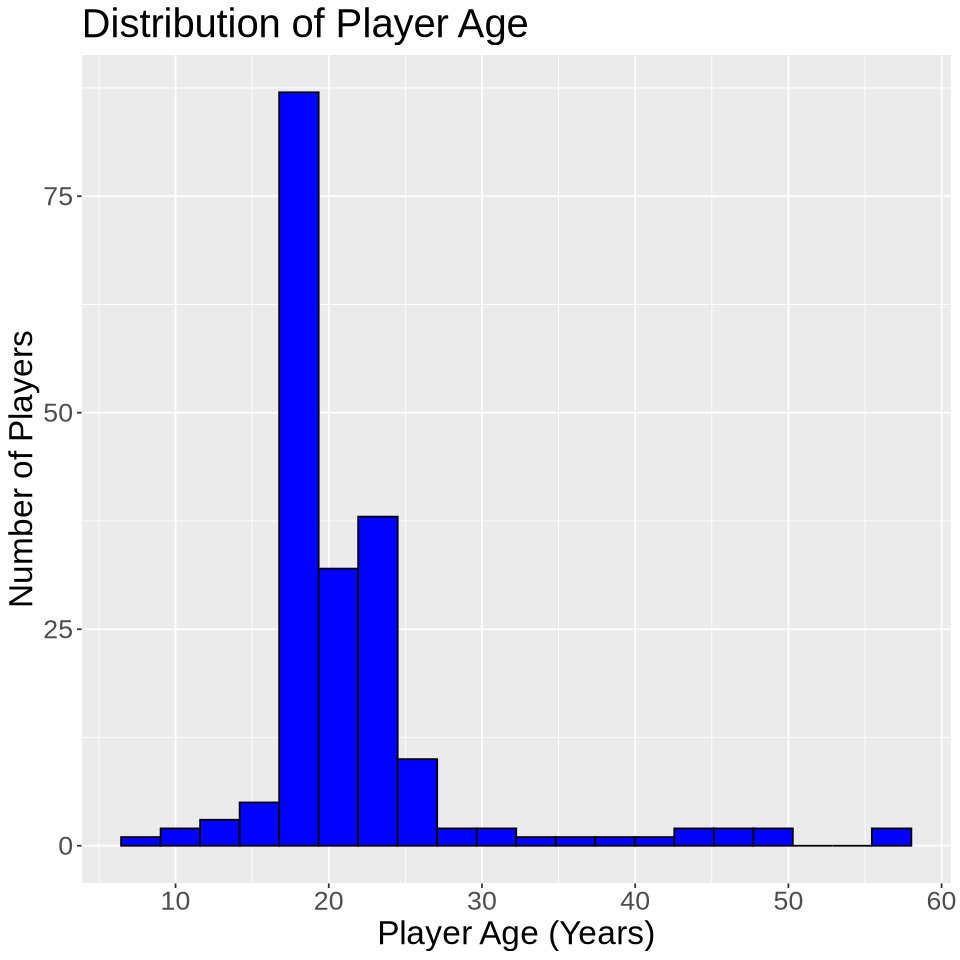

In [13]:
players_age_plot <- players_data |> 
                    ggplot(aes(x = Age)) + 
                        geom_histogram(bins = 20, fill = "blue", color = "black") + 
                        labs(title = "Distribution of Player Age", 
                             x = "Player Age (Years)", 
                             y = "Number of Players") + 
                        theme(text = element_text(size = 20))
players_age_plot

Player age is largely concentrated around early adulthood (~18-25), with few younger and older players. This suggests that age may have limitd variation as a predictor.

### 3.4.2 Newsletter Subscription by Gender

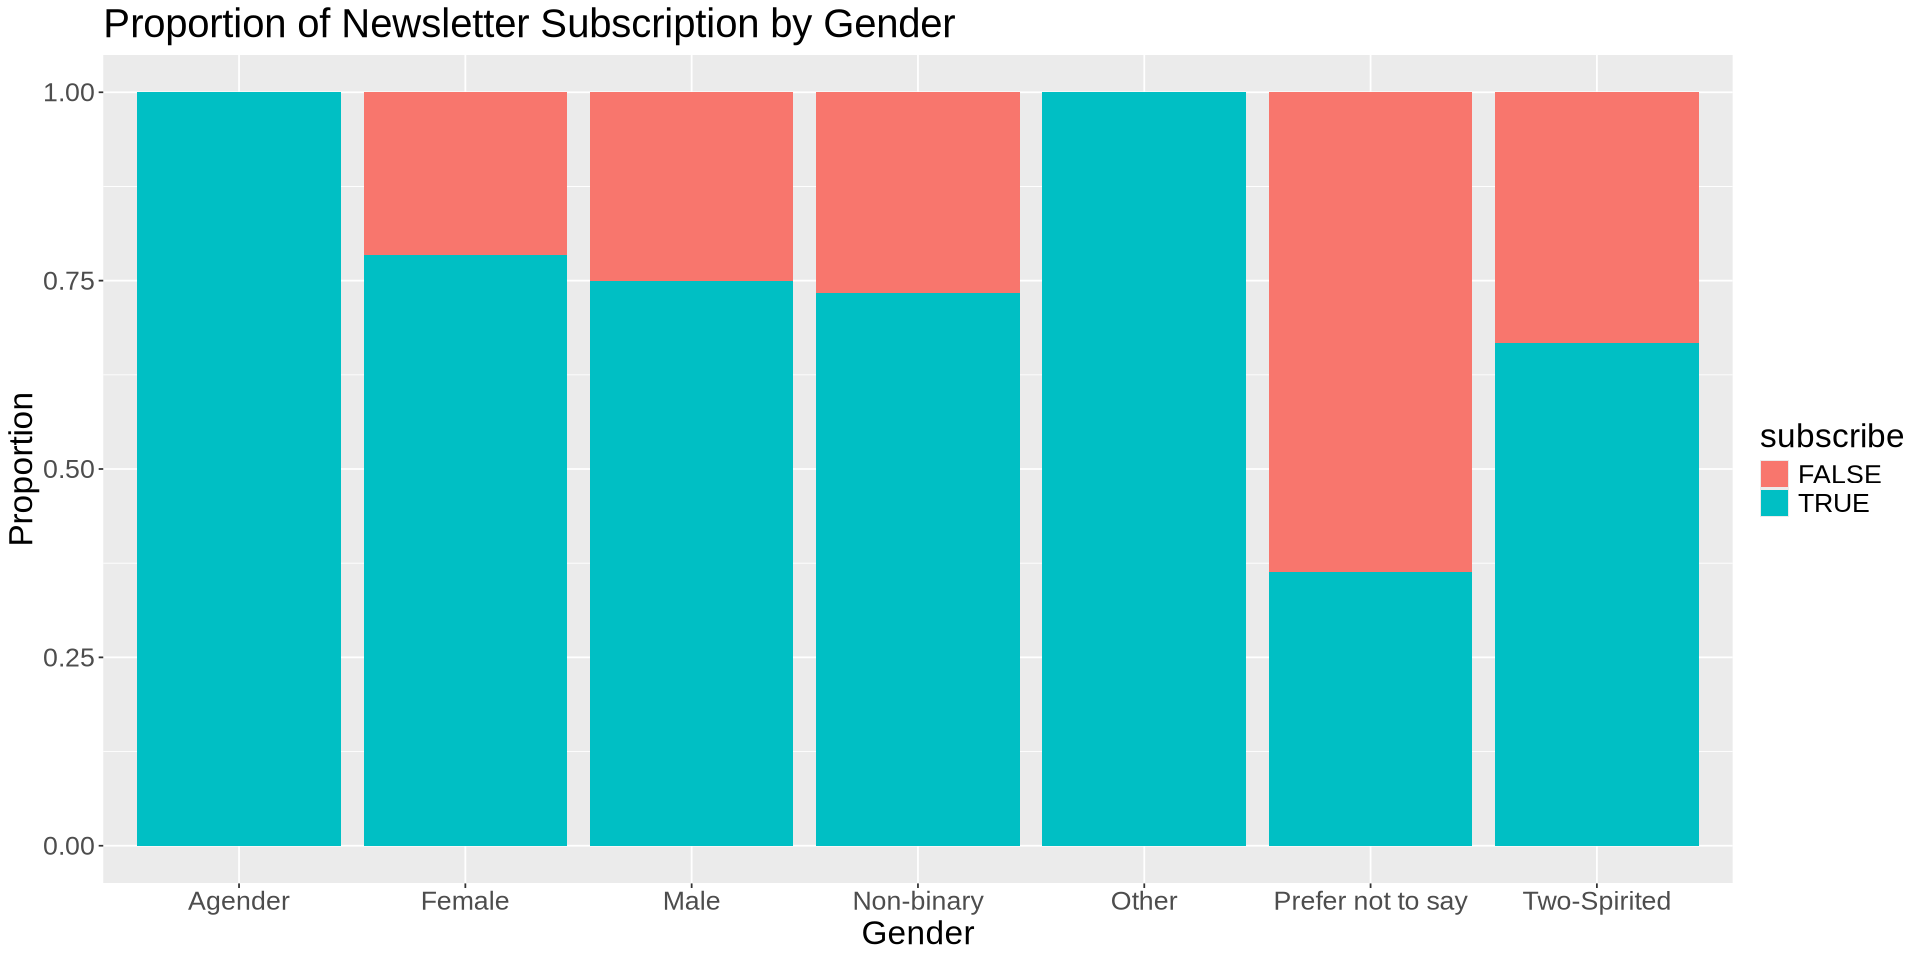

In [17]:
players_ns_by_gender <- players_data |> 
                        ggplot(aes(x = gender, fill = subscribe)) + 
                            geom_bar(position = "fill") + 
                            labs(title = "Proportion of Newsletter Subscription by Gender", 
                                 x = "Gender", 
                                 y = "Proportion") + 
                            theme(text = element_text(size = 20))
players_ns_by_gender

options(repr.plot.width = 17, 
        repr.plot.height = 8)

The proportions of subscription across gender categories appear relatively similar, but small category sizes may limit interpretability.

### 3.4.3 Experience Level vs Newsletter Subscription

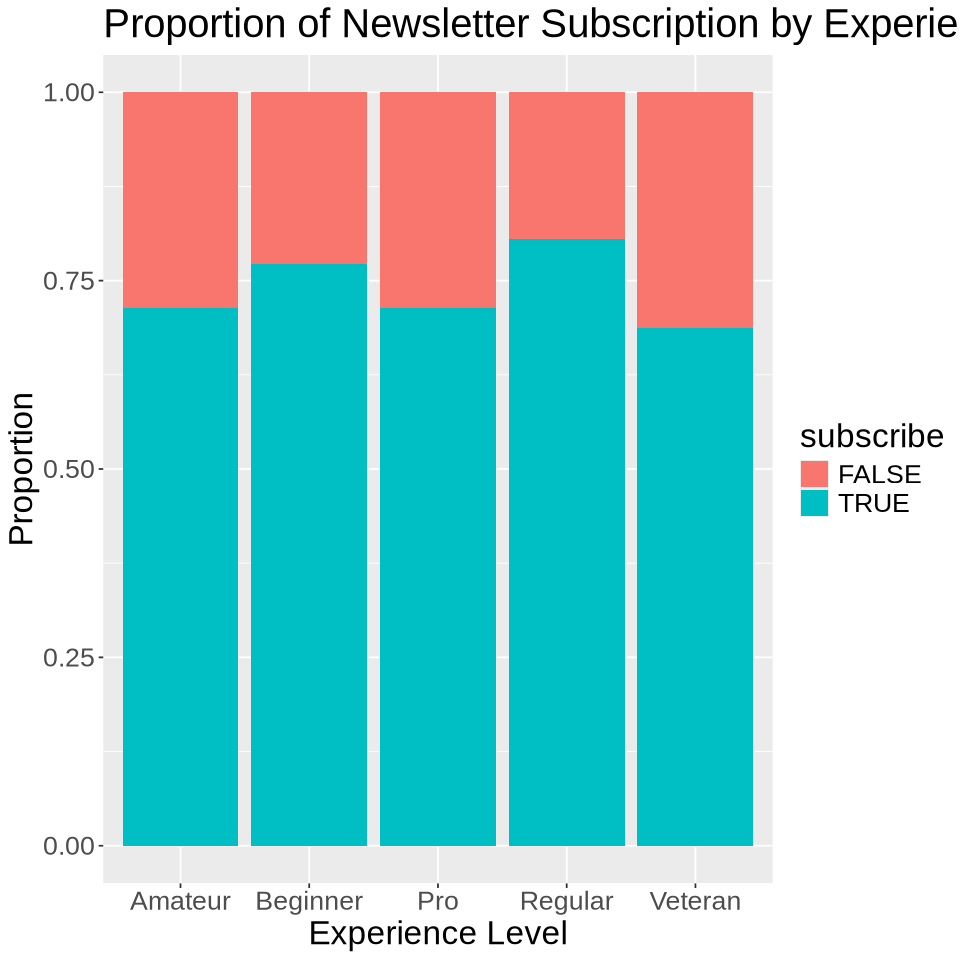

In [21]:
players_exp_vs_ns <- players_data |> 
                        ggplot(aes(x = experience, fill = subscribe)) + 
                            geom_bar(position = "fill") + 
                            labs(title = "Proportion of Newsletter Subscription by Experience Level", 
                                 x = "Experience Level", 
                                 y = "Proportion") + 
                            theme(text = element_text(size = 20))
players_exp_vs_ns

options(repr.plot.width = 6, 
        repr.plot.height = 8)

The proportions of subscription across experience level categories appear relatively similar, but small category sizes may limit interpretability.

## 3.5 Summary of Insights Relevant to the Question